# October 13, 2020
The purpose of this notebook is to transform all of the tetrodes at once rather than just dissecting one tetrode at a time. This is to be using the full evaluation of the posterior.

In [1]:
import neural_dimensionality_reduction as ndr
import numpy as np

Get some data

In [2]:
multiunits, position = ndr.data.get_formatted_data_full(ndr.data.data_dir)

print(multiunits.shape)

(615851, 4, 24)


/nix/store/hb4scs94q1fl6hypm6bz2bbi91dxqci7-python3-3.8.5-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3337: DtypeWarning: Columns (11,12,13,15) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Train a model. Like just one model.

Need to get spikes.

Train multiple models

In [3]:
def create_model():
    mu, sigma = 0, 2
    som = ndr.reduction.SelfOrganizingMap3D((16, 16, 16, 4), mu, sigma)
    return som

In [4]:
%%time
models = ndr.data.train_multiple_transformation_models_independently(multiunits, create_model)

CPU times: user 5min 37s, sys: 21 ms, total: 5min 37s
Wall time: 5min 37s


In [5]:
%%time
multiunits_transformed = ndr.data.transform_formatted_data_multiple_tetrodes(multiunits, models)

spikes: (615851, 4, 1)
(615851, 4, 1)
(615851, 4, 1)
(615851, 1)
(141513, 1)
(141513,)
spikes: (615851, 4, 1)
(615851, 4, 1)
(615851, 4, 1)
(615851, 1)
(62003, 1)
(62003,)
spikes: (615851, 4, 1)
(615851, 4, 1)
(615851, 4, 1)
(615851, 1)
(16499, 1)
(16499,)
spikes: (615851, 4, 1)
(615851, 4, 1)
(615851, 4, 1)
(615851, 1)
(79551, 1)
(79551,)
spikes: (615851, 4, 1)
(615851, 4, 1)
(615851, 4, 1)
(615851, 1)
(90925, 1)
(90925,)
spikes: (615851, 4, 1)
(615851, 4, 1)
(615851, 4, 1)
(615851, 1)
(52252, 1)
(52252,)
spikes: (615851, 4, 1)
(615851, 4, 1)
(615851, 4, 1)
(615851, 1)
(44064, 1)
(44064,)
spikes: (615851, 4, 1)
(615851, 4, 1)
(615851, 4, 1)
(615851, 1)
(67667, 1)
(67667,)
spikes: (615851, 4, 1)
(615851, 4, 1)
(615851, 4, 1)
(615851, 1)
(56662, 1)
(56662,)
spikes: (615851, 4, 1)
(615851, 4, 1)
(615851, 4, 1)
(615851, 1)
(83555, 1)
(83555,)
spikes: (615851, 4, 1)
(615851, 4, 1)
(615851, 4, 1)
(615851, 1)
(18892, 1)
(18892,)
spikes: (615851, 4, 1)
(615851, 4, 1)
(615851, 4, 1)
(615851, 1

In [6]:
from replay_trajectory_classification import ClusterlessDecoder

In [7]:
model_kwargs = {
    'bandwidth': np.array([1.0, 1.0, 1.0, 1.0, 12.5]) # 1, 2, 3, 4, position
}
decoder_raw = ClusterlessDecoder(model_kwargs=model_kwargs)  

decoder_raw.fit(position, multiunits)

/home/trevortknguyen/repos/dimensionality/replay_trajectory_classification/state_transition.py:10: RuntimeWarning: invalid value encountered in true_divide
  x /= x.sum(axis=1, keepdims=True)


ClusterlessDecoder(infer_track_interior=True,
                   initial_conditions_type='uniform_on_track',
                   model=<class 'replay_trajectory_classification.misc.NumbaKDE'>,
                   model_kwargs={'bandwidth': array([ 1. ,  1. ,  1. ,  1. , 12.5])},
                   movement_var=0.05,
                   occupancy_kwargs={'bandwidth': array([ 1. ,  1. ,  1. ,  1. , 12.5])},
                   occupancy_model=<class 'replay_trajectory_classification.misc.NumbaKDE'>,
                   place_bin_size=2.0, position_range=None, replay_speed=40,
                   transition_type='random_walk')

In [8]:
model_kwargs = {
    'bandwidth': np.array([1.0, 1.0, 1.0, 12.5]) # 1, 2, 3, 4, position
}
decoder_som = ClusterlessDecoder(model_kwargs=model_kwargs)  

decoder_som.fit(position, multiunits_transformed)

ClusterlessDecoder(infer_track_interior=True,
                   initial_conditions_type='uniform_on_track',
                   model=<class 'replay_trajectory_classification.misc.NumbaKDE'>,
                   model_kwargs={'bandwidth': array([ 1. ,  1. ,  1. , 12.5])},
                   movement_var=0.05,
                   occupancy_kwargs={'bandwidth': array([ 1. ,  1. ,  1. , 12.5])},
                   occupancy_model=<class 'replay_trajectory_classification.misc.NumbaKDE'>,
                   place_bin_size=2.0, position_range=None, replay_speed=40,
                   transition_type='random_walk')

In [16]:
%%time
predict_raw = decoder_raw.predict(multiunits[:5000], is_compute_acausal=False)

CPU times: user 4h 33min 59s, sys: 9.84 s, total: 4h 34min 8s
Wall time: 35min 21s


In [17]:
%%time
predict_som = decoder_som.predict(multiunits_transformed[:5000], is_compute_acausal=False)

CPU times: user 3h 41min 33s, sys: 8.69 s, total: 3h 41min 42s
Wall time: 28min 57s


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

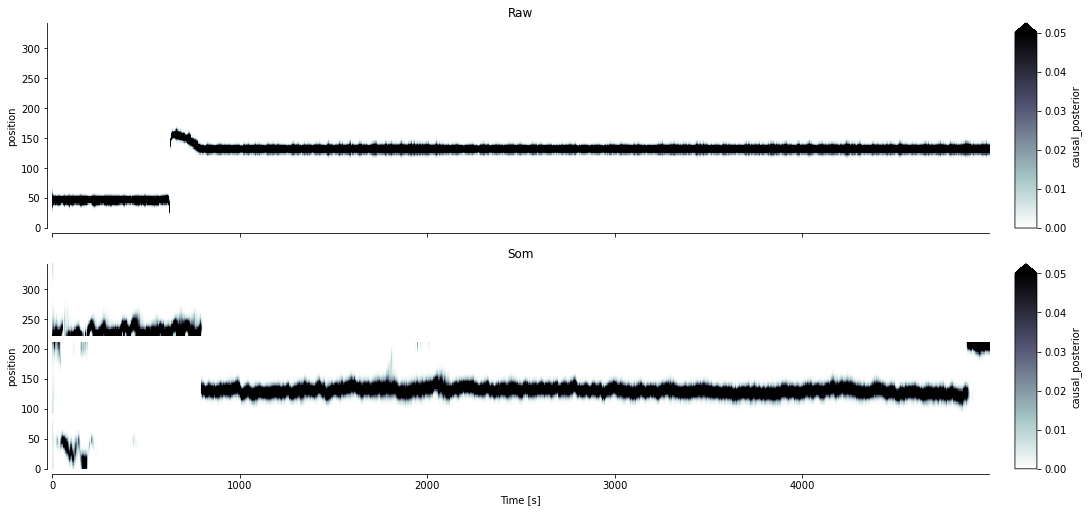

In [19]:
fig, axes = plt.subplots(2, 1, sharex=True, constrained_layout=True, figsize=(15, 7))

predict_raw.causal_posterior.plot(x="time", y="position", ax=axes[0], cmap="bone_r", vmin=0.0, vmax=0.05, clip_on=False)
axes[0].set_xlabel("")
axes[0].set_title("Raw")
predict_som.causal_posterior.plot(x="time", y="position", ax=axes[1], cmap="bone_r", vmin=0.0, vmax=0.05, clip_on=False)
axes[1].set_title("Som")
axes[1].set_xlabel('Time [s]')
sns.despine(offset=5)

In [20]:
pred_raw = np.argmax(np.nan_to_num(predict_raw.causal_posterior), axis=1)

In [21]:
pred_som = np.argmax(np.nan_to_num(predict_som.causal_posterior), axis=1)

In [22]:
np.mean(np.square(pred_raw - pred_som))

1021.1784